In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
%cd -q ..

In [34]:
import lcpfn 
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from transformer_us import Transformer

## Generate samples from LC prior

(0.0, 1.0)

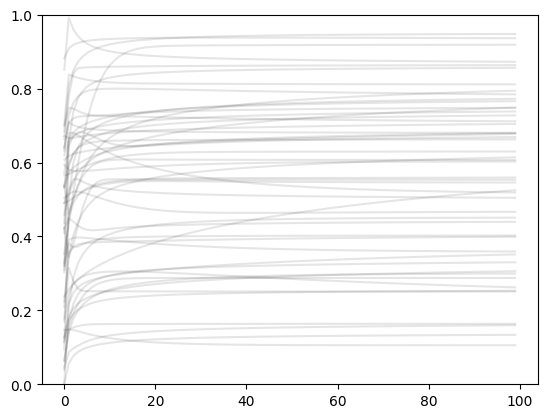

In [35]:
for _ in range(50):
    prior = lcpfn.sample_from_prior(np.random)
    curve, _ = prior()
    plt.plot(curve, "black", alpha=0.1)
plt.ylim(0, 1)

## Train a PFN model with the previous learning curve prior

In [36]:
get_batch_func = lcpfn.create_get_batch_func(prior=lcpfn.sample_from_prior)

In [40]:
# example of a batch

import lcpfn.train_us

device = "cuda" if torch.cuda.is_available() else "cpu"
model = Transformer(
    num_tokens=100,
    dim_model=8,
    num_heads=2,
    num_encoder_layers=3,
    num_decoder_layers=3,
    dropout_p=0.1,
).to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

X, Y, Y_noisy = get_batch_func(batch_size=100, seq_len=100, num_features=1)
# print(X.shape, Y.shape, Y_noisy.shape)

# print(Y[:,0])

# plt.ylim(0,1)
# for i in range(0,20):
#      plt.plot(Y[:,i])
# plt.show()

lcpfn.train_us.train_loop(model=model, opt=opt, loss_fn=loss_fn)

IndexError: index out of range in self

In [7]:
# Main function to train a PFN model

lcpfn.train_lcpfn

<function lcpfn.train_lcpfn.train_lcpfn(get_batch_func, seq_len: int = 100, emsize: int = 512, nlayers: int = 12, num_borders: int = 1000, lr: float = 0.001, batch_size: int = 100, epochs: int = 1000)>

In [8]:
# train a small model for 3 epochs

result = lcpfn.train_lcpfn(get_batch_func=get_batch_func, 
                          seq_len=100,
                         emsize=256,
                         nlayers=3,
                         num_borders=1000,
                         lr=0.001,
                         batch_size=10,
                         epochs=3)

Using 1000000 y evals to estimate 1000 buckets. Cut off the last 0 ys.
Using cpu:0 device
init dist
Not using distributed
DataLoader.__dict__ {'num_steps': 100, 'get_batch_kwargs': {'batch_size': 10, 'eval_pos_seq_len_sampler': <function train.<locals>.eval_pos_seq_len_sampler at 0x000001E89164EEE0>, 'seq_len_maximum': 100, 'device': 'cpu:0', 'num_features': 1, 'hyperparameters': {}}, 'num_features': 1}
Style definition: None
Using a Transformer with 2.23 M parameters


c:\Users\arthu\anaconda3\envs\lcpfn\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
c:\Users\arthu\Documents\projects\AIP\GitProject\deep-learning-project\lcpfn\lcpfn\bar_distribution.py:22: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/BucketizationUtils.h:28.)
  target_sample = torch.searchsorted(self.borders, y) - 1


-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 29.23s | mean loss -0.66 | pos losses   nan,-0.35,  nan,  nan,-0.30,  nan,-0.69,  nan,-0.98,  nan,-0.51,-0.34,  nan,-0.24,  nan,-1.22,  nan,-0.57,-0.93,-0.58,  nan,-0.03,-0.34,  nan,-1.01,  nan,  nan,-0.58,  nan,-1.02,  nan,-0.23,  nan,-0.68,-0.49,  nan,-0.85,  nan,-0.44,-0.77,  nan,-0.61,-0.62,-0.78,-0.98,  nan,  nan,-1.11,-0.47,-0.94,-0.94,-0.65,  nan,-0.36,  nan,-1.20,  nan,  nan,-0.57,  nan,  nan,-0.51,-0.31,-1.09,  nan,-0.39, 0.02,  nan,-1.04,-1.22,-0.68,-1.09,-0.08,-0.47,-0.90,  nan,-0.53,-0.83,  nan,-0.71,  nan,-0.78,-0.08,  nan,  nan,-0.06,-0.95,  nan,  nan,-1.26,-0.55,-0.87,-0.84,-0.81,  nan,-1.08,-0.97,-1.12,  nan, 0.20, lr 0.001 data time  0.01 step time  0.23 forward time  0.08
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
| en

In [9]:
# Get the trained model

model = result[2]
print(model)

TransformerModel(
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dro